In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline

plt.rcParams['figure.figsize'] = 20, 9

In [3]:
import os

os.chdir("/content/drive/MyDrive/Colab Notebooks")

Assuming that our dataset is massive we will take just 1% of the data. This can be done using the skiprows feature on pd.read_csv. The details of our dataframe will be printed right below!

In [22]:
filename = "Eluvio_DS_Challenge.csv"

p = 0.01  
df = pd.read_csv(filename, skiprows=lambda i: i>=0 and random.random() > p)
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5054 entries, 0 to 5053
Columns: 8 entries, 1201287889 to worldnews
dtypes: bool(1), int64(3), object(4)
memory usage: 1.9 MB


This is a significantly smaller subset and is manageable in memory! To retain the accuracy of the large scale of the data set moving forward, we will assume that the given csv is the subset we have selected from the massive csv.

In [25]:
df = pd.read_csv(filename)
df.info(verbose=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 186.8 MB


In [26]:
# Take a look at the data
df.head(10)

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews


In [27]:
df.isnull().values.any()

False

In [28]:
df.describe()

,time_created,up_votes,down_votes
count,5.092360e+05,509236.000000,509236.0
mean,1.380240e+09,112.236283,0.0
std,7.090436e+07,541.694675,0.0
min,1.201232e+09,0.000000,0.0
25%,1.341585e+09,1.000000,0.0
50%,1.392909e+09,5.000000,0.0
75%,1.436527e+09,16.000000,0.0
max,1.479817e+09,21253.000000,0.0


It seems the down_votes columns is a constant 0. As such, we can drop this column and reduce dimensionality as it will not be providing us with any information.

**Note:** If we were to drop columns, we can simply **load** our subset of the csv with only our desired columns further reducing memory usage. I would do this under normal circumstance but this will not be done here to show the thought process.

Lets check to see the category column!

In [29]:
df.category.unique()

array(['worldnews'], dtype=object)

It seems there is only one value in the category column meaning this will also not provide us any information. We can safely proceed with dropping the two aforementioned columns. 

In [30]:
df = df.drop(['down_votes', 'category'], axis=1)

Now lets convert the Unix time to date time format

In [31]:
times = pd.to_datetime(df['time_created'], unit='s')

In [32]:
# Now we can rewrite the Unix time as the time in Hour-Minute-Second format as we already have the date in a different column
df["time_created"] = times.dt.time
df

,time_created,date_created,up_votes,title,over_18,author
0,03:34:06,2008-01-25,3,Scores killed in Pakistan clashes,False,polar
1,03:34:35,2008-01-25,2,Japan resumes refuelling mission,False,polar
2,03:42:03,2008-01-25,3,US presses Egypt on Gaza border,False,polar
3,03:54:50,2008-01-25,1,Jump-start economy: Give health care to all,False,fadi420
4,15:25:20,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,False,mhermans
...,...,...,...,...,...,...
509231,12:12:44,2016-11-22,5,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory
509232,12:12:52,2016-11-22,1,There are people speculating that this could b...,False,SummerRay
509233,12:17:36,2016-11-22,1,Professor receives Arab Researchers Award,False,AUSharjah
509234,12:19:17,2016-11-22,1,Nigel Farage attacks response to Trump ambassa...,False,smilyflower


Here, we will explore to see if there is a period or periods in the week where posting has a higher probability of becoming a popular post which is denoted by having more up_votes.

In [33]:
# Duplicating the dataframe to make things a bit easier
time_df = df[['date_created','up_votes']]
time_df["weekday_created"] = times.dt.weekday
time_df["hour_created"] = times.dt.hour
time_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,date_created,up_votes,weekday_created,hour_created
0,2008-01-25,3,4,3
1,2008-01-25,2,4,3
2,2008-01-25,3,4,3
3,2008-01-25,1,4,3
4,2008-01-25,4,4,15
...,...,...,...,...
509231,2016-11-22,5,1,12
509232,2016-11-22,1,1,12
509233,2016-11-22,1,1,12
509234,2016-11-22,1,1,12


In [34]:
date_created_df = time_df.drop(["up_votes"], axis=1)
date_created_df = date_created_df.groupby(["weekday_created", 'hour_created']).count()
date_created_df = date_created_df.reset_index()

In [35]:
heatmap_created_post = date_created_df.pivot(index='weekday_created', columns='hour_created', values='date_created')

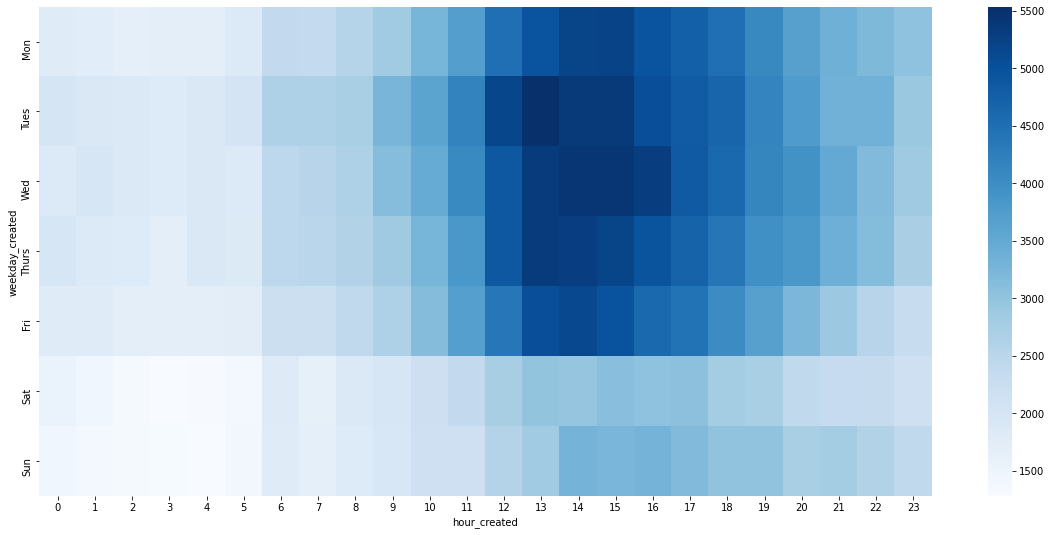

In [36]:
f, ax = plt.subplots()

y_axis_labels = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
ax = sns.heatmap(heatmap_created_post, yticklabels=y_axis_labels, cmap='Blues')

This is so cool! Here, we can see the heatmap of when posts are created. According to this, the most posts are created on the weekdays sometime between noon and four with Tuesday around 1 showing the highest amount of posts created.

Though I am speculating, the posts might be uploaded during lunch hours at work!

**What this tells us:**
From a business analytics standpoint, the most posts being created must have a correlation with the highest traffic on the website. If we were an advertising company we could use this information to place advertisements around these times more often than other times of the week. On the other hand, if we were the website itself we could charge a premium for advertising during this period. 

In [37]:
successful_post_cutoff = 200

up_votes_df = time_df.drop(["date_created"], axis=1)
up_votes_df['per_suc'] = pd.Series(np.where(time_df['up_votes'] > successful_post_cutoff, 1, 0))
up_votes_df = up_votes_df.groupby(["weekday_created", 'hour_created']).mean()
up_votes_df = up_votes_df.reset_index()

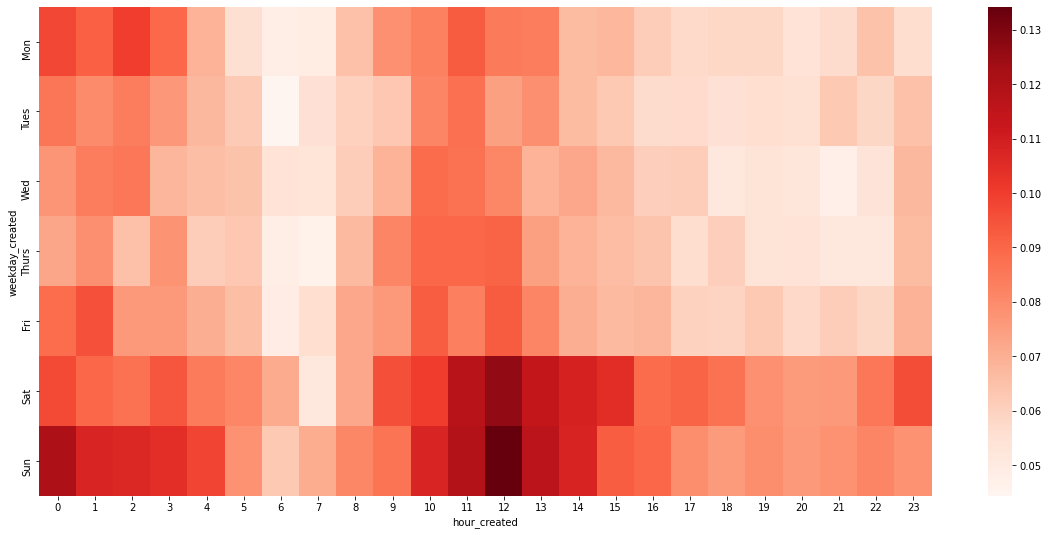

In [38]:
heatmap_up_votes = up_votes_df.pivot(index='weekday_created', columns='hour_created', values='per_suc')

f, ax = plt.subplots()
y_axis_labels = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
ax = sns.heatmap(heatmap_up_votes, yticklabels=y_axis_labels, cmap='Reds')

Wow! This heatmap above shows us the percentage of "successful" posts. **NOTE:** A "successful post" here has been chosen as a arbitrary value of 200 up_votes. This can be changed and we see the heatmap reflect those changes.

Though I am speculating again, maybe the white areas of our heatmap indicating less successful posts are around times people are waking up which means perhaps they wont jump on a computer and look at their favorite forums immediately. 
Another speculation I could state is the two distinct areas. Why is this heatmap not like the first heatmap? It may be that there are two popular time zones that this forum/website is being used!

**Why:**
With many posts by many users having 0 down_votes and 0 up_votes I decided to filter our any posts that had a low number of upvotes, as these 0 value posts indicate that there were no interactions between users and the post. As such it is harder to gather whether the posts were liked or disliked and whether they were even seen or not. Applying a minimum of points to make a post successful, we can better see a percentage of posts that beat our threshold. 

**What this tells us:**
On this heatmap, we can see two major clusterings of red shading. The main larger one around noon on Sundays and the other around midnight on Sundays. There seem to be two columns indicating that a good majority of successful posts during the weekdays are posted around 9 or 10 **OR** noon to 2!


Here, I am assuming that the website the data is collected from collates posts that are successful higher than posts that are not. As such, successful posts will have more traffic and more users clicking on the news articles.
From a business analytics standpoint, if we were a news company and we wanted to drive more traffic to our website, or if I simply wanted to gather up_votes on this forum I would post my headline at or around the darkest area on this heatmap. 
Example: I have written an article on my blog about the U.S. President meeting with the Prime Minister of the UK. If I want my blog to get the most ad revenue I would upload my article to the worldnews forum at noon on Sunday.

## **Text Analysis**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [40]:
# Transforming our 'over_18' feature to to binary
df['over_18'] = np.where(df['over_18'] == True, 1, 0)

In [55]:
X = pd.DataFrame(df.title)
y = pd.DataFrame(df.over_18)

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.25)

In [56]:
# We drop stop words as these will not provide much information on popularity or allow
# for better predictions etc
C_vect = CountVectorizer(stop_words='english')

C_X_train = C_vect.fit_transform(X_train.title)
C_X_test = C_vect.transform(X_test.title)

Here we used most of the dataset to make sure we get an accurate representation.

Lets see what the most commonly used words are. This will give us a (general) idea of what is popular on this forum.

Here are the top 20 most common words in our train set:

In [57]:
sum_matrix = C_X_train.sum(axis=0) 
words_freq = [(word, sum_matrix[0, idx]) for word, idx in C_vect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:20]

[('china', 19776),
 ('says', 19102),
 ('new', 17346),
 ('syria', 14247),
 ('russia', 14058),
 ('world', 13603),
 ('police', 12420),
 ('government', 12332),
 ('israel', 12115),
 ('iran', 11826),
 ('president', 11435),
 ('killed', 10685),
 ('people', 10334),
 ('state', 10145),
 ('attack', 9733),
 ('war', 9582),
 ('russian', 9266),
 ('military', 8906),
 ('uk', 8794),
 ('north', 8655)]

This is well within expectations. With the data being collected from the worldnews category, international news involving many powerful countries like China, Russia, Iran are mentioned. Another thing we can note is words like "war", "attack", "military" and "killed" are among the most popular words used as news covering controversy and conflict are more widely read and circulated.

# Down Sampling

We will try to predict if an article is in the 'over_18' category or not. To do this however, we will employ a downsampling to counteract the drastic skew of our labels. We have approximately 300 'over_18' news article headlines while the rest are not classified in the 'over_18' category.

We will keep a skewed distribution to retain some of the accuracy with respect to the original data.

In [60]:
size_of_pos = np.sum(df.over_18)

scale = 4
size_of_neg = scale * size_of_pos
df_downsample = pd.concat([df[['title','over_18']][df.over_18==1], df[['title','over_18']][df.over_18 == 0].sample(n=size_of_neg)])

print("Our positive class sample ratio is: ", 1/(scale+1))
print("Our negative class sample ratio is: ", scale/(scale+1))

Our positive class sample ratio is:  0.2
Our negative class sample ratio is:  0.8


In [72]:
X = pd.DataFrame(df_downsample.title)
y = pd.DataFrame(df_downsample.over_18)

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.1)

In [73]:
C_vect = CountVectorizer(stop_words='english')

C_X_train = C_vect.fit_transform(X_train.title)
C_X_test = C_vect.transform(X_test.title)

LogReg = LogisticRegression()

LogReg.fit(C_X_train, Y_train.astype('int'))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
pred = LogReg.predict(C_X_test)
acc_score = metrics.accuracy_score(Y_test, pred)
f1_score = metrics.f1_score(Y_test, pred, average='macro')
recall = metrics.recall_score(Y_test, pred)
precision = metrics.precision_score(Y_test, pred)

print('Total accuracy classification score: {}'.format(acc_score))
print('Total recall score: {}'.format(recall))
print('Total precision score: {}'.format(precision))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.88125
Total recall score: 0.5135135135135135
Total precision score: 0.95
Total F1 classification score: 0.7972116603295312


Overall these results are higher than expected. This is not surprising as even a majority class predictive model will be correct 80% of the time on our down sampled data. As we can see the recall here is quite low as not many of the postives are being predicted correctly. This makes sense as the recall will be very sensitive as we originally have a very low number of postive samples.

Next, lets compare the LogisticRegression model with a MultinomialNB (MNB) Model!

In [75]:
from sklearn.naive_bayes import MultinomialNB
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [76]:
clf = MultinomialNB(alpha=0)

clf.fit(C_X_train, Y_train)

C_X_test = C_vect.transform(X_test.title)

pred = clf.predict(C_X_test)
acc_score = metrics.accuracy_score(Y_test, pred)
f1_score = metrics.f1_score(Y_test, pred, average='macro')
recall = metrics.recall_score(Y_test, pred)
precision = metrics.precision_score(Y_test, pred)

print('Total accuracy classification score: {}'.format(acc_score))
print('Total recall score: {}'.format(recall))
print('Total precision score: {}'.format(precision))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.8125
Total recall score: 0.4594594594594595
Total precision score: 0.6296296296296297
Total F1 classification score: 0.70703125


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


This is performing much worse than the logistic regression but this is expected as our alpha is set to 0. Note the error printed by the MultinoulliNB module. Lets tune the hyperparameter of alpha. This will vary our level of Laplace Smoothing which will allow a more flexibility for 0 probability situations in a Naive Bayes setting.

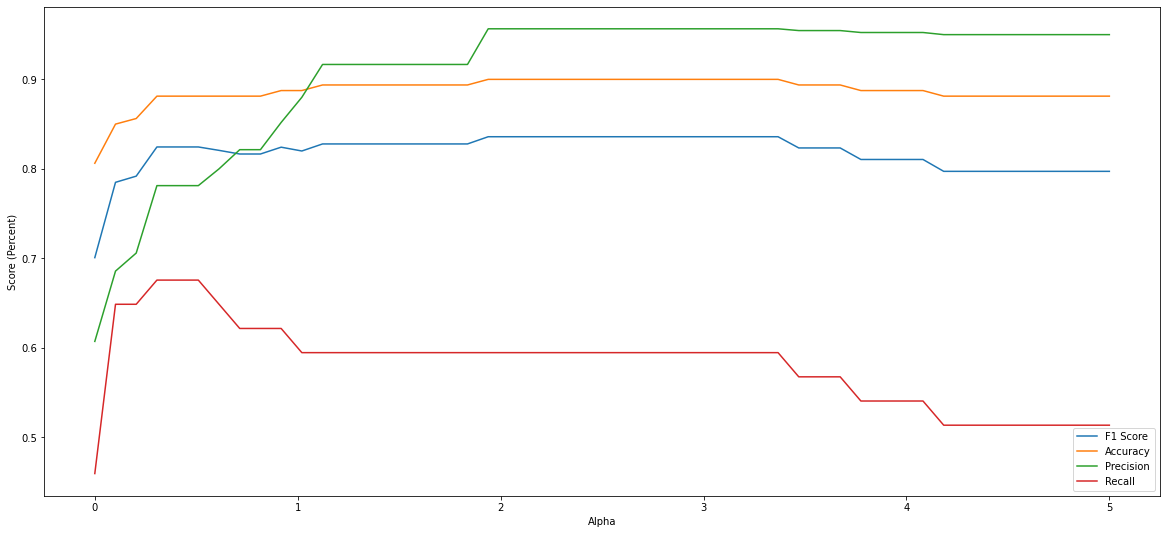

In [77]:
alphas = np.linspace(1.0e-5, 5, 50)

accuracies = []
f1s = []
recalls = []
precisions = []


# Build the classifier
for a in alphas:
  clf = MultinomialNB(alpha=a)

  #  Train the classifier
  clf.fit(C_X_train, Y_train)

  # Get the test vectors
  C_X_test = C_vect.transform(X_test.title)

  # Predict and score the vectors
  pred = clf.predict(C_X_test)

  acc_score = metrics.accuracy_score(Y_test, pred)
  f1_score = metrics.f1_score(Y_test, pred, average='macro')
  recall = metrics.recall_score(Y_test, pred)
  precision = metrics.precision_score(Y_test, pred)

  accuracies.append(acc_score)
  f1s.append(f1_score)
  recalls.append(recall)
  precisions.append(precision)


plt.plot(alphas, f1s, label = "F1 Score")
plt.plot(alphas, accuracies, label = "Accuracy")
plt.plot(alphas, precisions, label = "Precision")
plt.plot(alphas, recalls, label = "Recall")
plt.legend(loc="lower right")
plt.xlabel("Alpha")
plt.ylabel("Score (Percent)")
plt.show()

As seen in the graph above, there is a drastic trade taking place between the precision and the recall. Depending on the intended use for the model, the paramter of alpha can be used to choose whether the precision or recall will be more heavily weighted and therefore preferred. 

Lets try rerunning our model with an alpha parameter value of around 1.3. The F1 score seems to increase until around this area where it then holds approximately steady.

In [78]:
clf = MultinomialNB(alpha=1.3)

clf.fit(C_X_train, Y_train)

C_X_test = C_vect.transform(X_test.title)

pred = clf.predict(C_X_test)
acc_score = metrics.accuracy_score(Y_test, pred)
f1_score = metrics.f1_score(Y_test, pred, average='macro')
recall = metrics.recall_score(Y_test, pred)
precision = metrics.precision_score(Y_test, pred)

print('Total accuracy classification score: {}'.format(acc_score))
print('Total recall score: {}'.format(recall))
print('Total precision score: {}'.format(precision))
print('Total F1 classification score: {}'.format(f1_score))

Total accuracy classification score: 0.89375
Total recall score: 0.5945945945945946
Total precision score: 0.9166666666666666
Total F1 classification score: 0.8278372048863851


We can see significant improvement over the 0 alpha MultinoulliNB model. Though not by a large margin, this tuned MNB model also beats out the logistic regression model we tried initially!

Below, we can take a look at which instances our model is predicting incorrectly.

In [79]:
df1 = pd.DataFrame(pred, columns = ["over_18"])
Y_temp = X_test.join(Y_test).reset_index(drop=True)

In [80]:
df1 = Y_temp.join(df1, lsuffix='_true', rsuffix='_pred')
df1['res'] = np.where(df1['over_18_pred'] == df1['over_18_true'], True, False)
df1[df1.res == False]

,title,over_18_true,over_18_pred,res
5,Naked Spanish clowns anger Palestinians,1,0,False
9,Syria s Torture Machine - Channel 4 exclusive ...,1,0,False
21,Iranian Women Excluded From Major Areas of Uni...,0,1,False
22,Special Report: Brazil s gringo problem: its b...,1,0,False
23,Tibetan in Delhi Sets Self Alight to Protest C...,1,0,False
31,NSA hackers Shadow Brokers have released 60% o...,1,0,False
35,"After being held hostage 33 days by the FARC, ...",1,0,False
46,"Syria army dropped 2,000 barrel bombs since Ju...",1,0,False
50,BBC News - Phone hacking: Brooks steps down ov...,1,0,False
60,Footage of gunbattle between Turkish security ...,1,0,False


Not only is it difficult to detect a pattern here but it is also difficult to say why the model predicts labels incorrectly.

One important thing to note is that the results here are built upon our downsampled dataset which has a 20:80 ratio between positive and negative classes, respectively. Evening out the positive-negative class imbalance would increase our overall performance. On the other hand, increasing the imbalance will result in a less accurate performance and labeling. The lack of positive samples is the biggest obstacle in building an accurate predictive model. Increasing the number of positive samples in our dataset would significantly boost performance.